**DESCOMPOSICIÓN DE LA TAREA**

1- Objetivo principal: identificar los operadores telefónico que presentan bajo rendimiento mediante análisis cuantitativo de los datos presentados en los dataset

 Los principales interesados son los directivos de la empresa que pueden utilizar este análisis para la mejora de las métricas de negocio. Luego se debe considerar a la línea de supervisión y gerenacia,pues esto les permitirá conocer los operadores más ineficaces mediante el análisis cuantitativo de las características presentadas

 Se pueden tomar distintos tipos de decisiones basadas en el análisis que se realizará a continuación
 En primer lugar, se tienen las decisiones relativas a la gestión de personal: identificacion de operadores que requieren capacitación adicional, determinas necesidades de formación profesional para los operadores, evaluación de la idoneidad de los operadores para su función y determinas si es necesario un cambio en estas
 Luego existen decisiones basadas en las operaciones: redistribuir cargar de trabajo según las caoacidades de cada operador, ajustar horarios para optimizar cobertura, implementar programas de mejora específicos y establecer metas de rendimiento más específicas.
 Finalmente, existen decisiones estratégicas que pueden surgir de este estudio.Aquellas serían desarrollar programas de formación basados en deficiencias identificadas, crear sistemas de monitoreo continuo del desempeño, establecer políticas de RRHH basadas en datos reales y mejorar procesos de selección de nuevos operadores.

2- Hipótesis: Los operadores con mayor cantidad de llamadas perdidas tienen tiempos de espera significativamente más altos que los operadores con menor cantidad de llamadas perdidas.

H0: no existe diferencia significativa en los tiempos de espera promedio entre operadores con alta y baja cantidad de llamadas perdidas

Con esta hipótesis se podrá conectar directamente dos de los indicadores clave de ineficacia mencionados.Además, permite identificar si existe una relación causal o correlacional entre ambas métricas-Finalmente, ayuda también a entender si un problema (llamadas perdidas) está relacionado con otro (tiempos de espera).
Si se confirma esta hipótesis, entonces los supervisores pueden enfocar la capacitación en gestión de tiempo y manejo de llamadas.Por otra parte, si se rechaza, entonces se sugiere que ambos problemas tienen causas independientes y requieren de estrategias diferentes.

Se deben segmentar los operadores en dos grupos: uno de operadores comn alta cantidad de llamas perdidas (percentil 75 o superior) y otro de operadores con baja cantidad de llamadas perdidas (percentil 25 o inferior)

**Preprocesamiento de datos**

In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, levene, sem, t
import warnings

In [2]:
calls = pd.read_csv("C:\\Users\\Stephania\\.vscode\\P14\\telecom_dataset_us.csv", sep=',')
clients = pd.read_csv("C:\\\\Users\\Stephania\\.vscode\\P14\\telecom_clients_us.csv", sep=',')


In [3]:
print(calls.info())
print(clients.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    objec

In [4]:
display(calls.head())
display(clients.head())


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [5]:
calls['date'] = pd.to_datetime(calls['date'])
clients['date_start'] = pd.to_datetime(clients['date_start'])

if 'is_missed_call' in calls.columns:
 calls['is_missed_call'] = calls['is_missed_call'].astype(bool)

In [6]:
 # se identifican valores faltantes
print("\n Verificación de valores faltantes en calls")
missing_calls = calls.isnull().sum()
print(missing_calls)

print("\n Verificación de valores faltantes en clients")
missing_clients = clients.isnull().sum()
print(missing_clients)


 Verificación de valores faltantes en calls
user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

 Verificación de valores faltantes en clients
user_id        0
tariff_plan    0
date_start     0
dtype: int64


Se observan valores nulos en las columnas internal y operator_id, por lo que se eliminan estás filas, obteniendo un nuevo dataset sin estos datos

In [7]:
#se eliminan filas con datos nulos
calls = calls.dropna()

print(calls.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45670 entries, 1 to 53900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                    
---  ------               --------------  -----                    
 0   user_id              45670 non-null  int64                    
 1   date                 45670 non-null  datetime64[ns, UTC+03:00]
 2   direction            45670 non-null  object                   
 3   internal             45670 non-null  object                   
 4   operator_id          45670 non-null  float64                  
 5   is_missed_call       45670 non-null  bool                     
 6   calls_count          45670 non-null  int64                    
 7   call_duration        45670 non-null  int64                    
 8   total_call_duration  45670 non-null  int64                    
dtypes: bool(1), datetime64[ns, UTC+03:00](1), float64(1), int64(4), object(2)
memory usage: 3.2+ MB
None


In [8]:
#se unen ambos datasets 
merged = calls.merge(clients, on='user_id', how='inner')

merged.to_csv('merged.csv', index=False, encoding='utf-8-sig')
print(f"Datasets unidos: {merged.shape[0]:,} registros")

Datasets unidos: 45,670 registros


In [9]:
# filtrado de llamadas entrantes

print("\n FILTRADO POR DIRECCIÓN DE LA LLAMADA")
print(f"Registros antes del filtro: {len(merged)}")

# Filtrar solo llamadas entrantes
incoming = merged[merged['direction'] == 'in'].copy()

print(f"Registros después del filtro: {len(incoming)}")
print(f"Porcentaje de llamadas entrantes: {len(incoming)/len(merged)*100:.2f}%")


 FILTRADO POR DIRECCIÓN DE LA LLAMADA
Registros antes del filtro: 45670
Registros después del filtro: 13953
Porcentaje de llamadas entrantes: 30.55%


In [10]:
print("\n VERIFICACIÓN DE DURACION DE LLAMADAS ")

# verificaión que total_call_duration >= call_duration
# Estadísticas básicas antes de la validación
print("\nEstadísticas de call_duration:")
print(incoming['call_duration'].describe())

print("\nEstadísticas de total_call_duration:")
print(incoming['total_call_duration'].describe())

# Identificar registros donde total_call_duration < call_duration (inconsistentes)
inconsistent_mask = incoming['total_call_duration'] < incoming['call_duration']
inconsistent_records = incoming[inconsistent_mask]

print(f"\nRegistros inconsistentes (total_call_duration < call_duration): {len(inconsistent_records)}")
print(f"Porcentaje de registros inconsistentes: {len(inconsistent_records)/len(incoming)*100:.2f}%")

if len(inconsistent_records) > 0:
    print("\nMuestra de registros inconsistentes:")
    print(inconsistent_records[['call_duration', 'total_call_duration', 'operator_id', 'date']].head(10))
    
    print("\nEstadísticas de registros inconsistentes:")
    print("call_duration:")
    print(inconsistent_records['call_duration'].describe())
    print("total_call_duration:")
    print(inconsistent_records['total_call_duration'].describe())

# Crear dataset filtrado (solo registros consistentes)
filtered = incoming[~inconsistent_mask].copy()

print(f"\nRegistros después de eliminar inconsistencias: {len(filtered)}")
print(f"Registros eliminados: {len(incoming) - len(filtered)}")


 VERIFICACIÓN DE DURACION DE LLAMADAS 

Estadísticas de call_duration:
count    13953.000000
mean       753.200960
std       1485.243012
min          0.000000
25%         66.000000
50%        262.000000
75%        848.000000
max      33897.000000
Name: call_duration, dtype: float64

Estadísticas de total_call_duration:
count    13953.000000
mean       850.779044
std       1597.942776
min          1.000000
25%         93.000000
50%        308.000000
75%        954.000000
max      34280.000000
Name: total_call_duration, dtype: float64

Registros inconsistentes (total_call_duration < call_duration): 0
Porcentaje de registros inconsistentes: 0.00%

Registros después de eliminar inconsistencias: 13953
Registros eliminados: 0


In [11]:

# Calcular tiempo de espera
filtered['waiting_time'] = filtered['total_call_duration'] - filtered['call_duration']

print("Estadísticas del tiempo de espera:")
print(filtered['waiting_time'].describe())

# Verificar que no hay tiempos de espera negativos
negative_waiting = filtered[filtered['waiting_time'] < 0]
print(f"\nRegistros con tiempo de espera negativo: {len(negative_waiting)}")

if len(negative_waiting) > 0:
    print(" Hay tiempos de espera negativos. Esto indica un problema en los datos.")
    print(negative_waiting[['call_duration', 'total_call_duration', 'waiting_time']].head())


Estadísticas del tiempo de espera:
count    13953.000000
mean        97.578084
std        185.023660
min          0.000000
25%         17.000000
50%         38.000000
75%         98.000000
max       3998.000000
Name: waiting_time, dtype: float64

Registros con tiempo de espera negativo: 0


In [12]:
print("\n RESUMEN FINAL DEL PROCESAMIENTO")
print(f"Dataset original: {len(merged):,} registros")
print(f"Después de filtrar llamadas entrantes: {len(incoming):,} registros")
print(f"Después de eliminar inconsistencias: {len(filtered):,} registros")
print(f"Registros finales válidos: {len(filtered):,}")

print(f"\nPorcentaje de datos utilizables: {len(filtered)/len(merged)*100:.2f}%")


 RESUMEN FINAL DEL PROCESAMIENTO
Dataset original: 45,670 registros
Después de filtrar llamadas entrantes: 13,953 registros
Después de eliminar inconsistencias: 13,953 registros
Registros finales válidos: 13,953

Porcentaje de datos utilizables: 30.55%


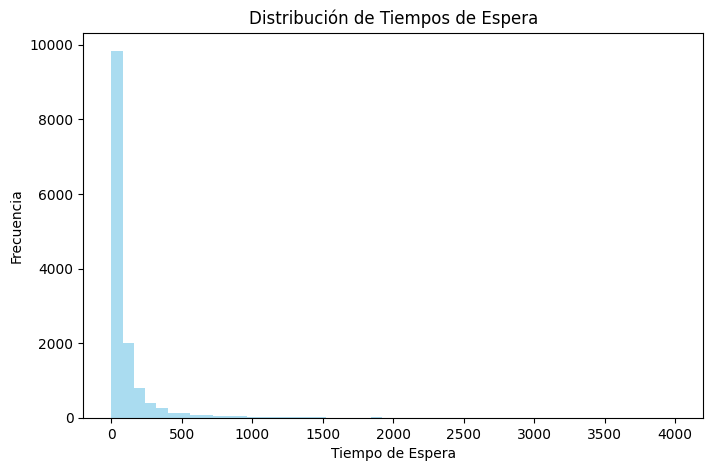

In [ ]:

fig, axes = plt.subplots(1, 1, figsize=(8, 5))

# Graficar histograma de tiempos de espera
axes.hist(filtered['waiting_time'], bins=50, alpha=0.7, color='skyblue')
axes.set_title('Distribución de Tiempos de Espera')
axes.set_xlabel('Tiempo de Espera')
axes.set_ylabel('Frecuencia')

# Mostrar gráfico
plt.show()




Se observa una asimetría hacia la izquierda, lo que significa que no son  muchos los usuarios que deban pasar por largos tiempos de espera.


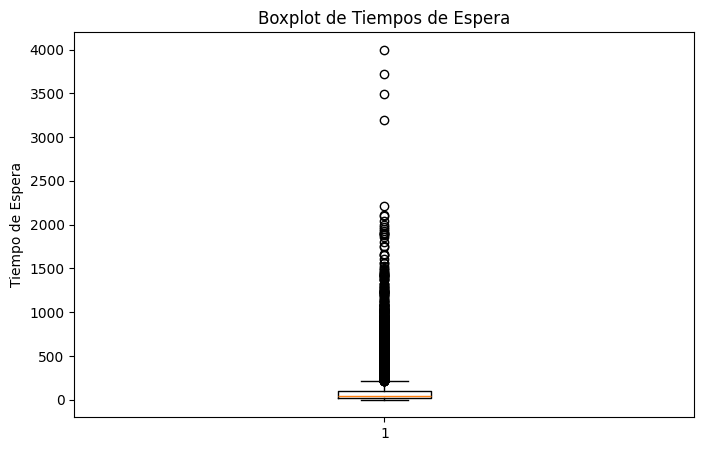

In [ ]:
# boxplot de distribución de tiempos de espera
plt.figure(figsize=(8, 5))
plt.boxplot(filtered['waiting_time'])
plt.title('Boxplot de Tiempos de Espera')
plt.ylabel('Tiempo de Espera')
plt.show()

No se observan  muchos valores atípicos, esto indica que no existe una gran cantidad de usuarios que experimenten esperas significativamente diferentes (altas) al resto.

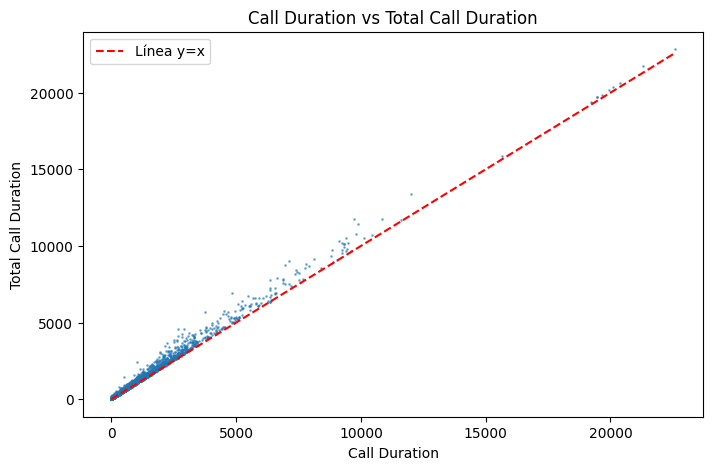

In [29]:
# 3. Scatter plot: call_duration vs total_call_duration
sample_data = filtered.sample(min(5000, len(filtered)))

plt.figure(figsize=(8, 5))
plt.scatter(sample_data['call_duration'], sample_data['total_call_duration'], alpha=0.5, s=1)
plt.plot([0, sample_data['call_duration'].max()],
         [0, sample_data['call_duration'].max()], 'r--', label='Línea y=x')
plt.title('Call Duration vs Total Call Duration')
plt.xlabel('Call Duration')
plt.ylabel('Total Call Duration')
plt.legend()
plt.show()

Este gráfico permite visualizar la relación entre la duración de una llamada y la duración total de las llamadas incluyendo el tiempo de espera para cada registro.En este caso, la mayoría de los puntos se alinean cerca de la línea y=x lo que  indica que, para muchos registros, la duración de la llamada individual es similar a la duración total registrada, lo que indica que en general los tiempos de espera son bajos.Aún asi, se observan algunos puntos más lejanos a la línea continua, lo que indica mayores tiempos de espera.

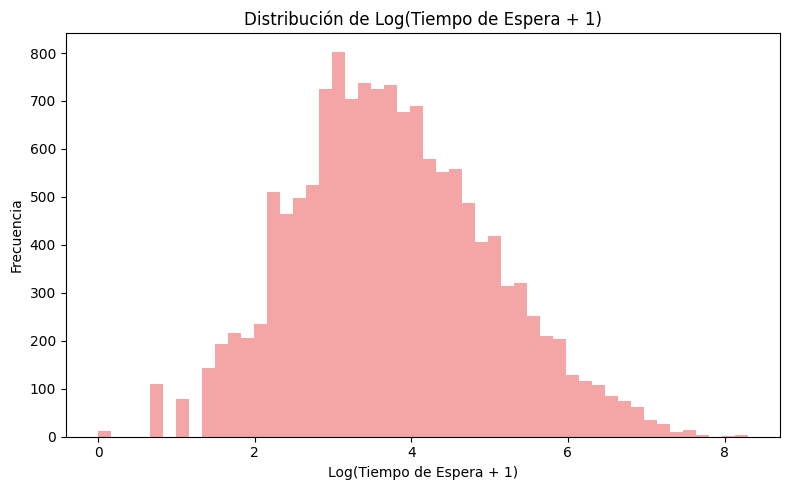

In [ ]:

# distribución del tiempo de espera (se utiliza escala logaritimica pues hay valores muy grandes)
plt.figure(figsize=(8, 5))

if filtered['waiting_time'].max() > 1000:
    plt.hist(np.log1p(filtered['waiting_time']), bins=50, alpha=0.7, color='lightcoral')
    plt.title('Distribución de Log(Tiempo de Espera + 1)')
    plt.xlabel('Log(Tiempo de Espera + 1)')
else:
    plt.hist(filtered['waiting_time'], bins=50, alpha=0.7, color='lightcoral')
    plt.title('Distribución de Tiempos de Espera (detalle)')
    plt.xlabel('Tiempo de Espera')

plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Se utilizó escala logarítima pues los valores de 'waiting_time' eran muy altos y esto podría provocar una distorsión de la visualización y se podría ver lineal.Por esto es que con escala logarítimica los valores extremos se comprimen facilitando la identificación de patrones y distribución general de los datos.
Para este caso, se observa que en general existen pocos picos de frecuencia respecto a los tiempos de espera más altos, lo que significa poca ocurrencia de largos tiempos de espera. De hecho, a medida que los tiempos de espera con más elevados, la frecuencia de ocurrencia de estos va disminuyendo.

Con todo el pre procesamiento y análisis exploratorio de datos realizados, se deben comenzar a segmentar los datos para reañizar la prueba de hipótesis: en primer lugar se realiza un análisis por operador, obteniendo la estadística de las llamadas perdidas de estos.Luego se segamentan estos entre aquellos que presentan alta tasa de llamadas perdidas y aquellos que presentan tasas más bajas

In [17]:
print("PRUEBA DE HIPÓTESIS: TIEMPOS DE ESPERA VS LLAMADAS PERDIDAS")
print("H0: No existe diferencia significativa en los tiempos de espera promedio")
print("    entre operadores con alta y baja cantidad de llamadas perdidas")
print("H1: Existe diferencia significativa en los tiempos de espera promedio")
print("    entre operadores con alta y baja cantidad de llamadas perdidas")


PRUEBA DE HIPÓTESIS: TIEMPOS DE ESPERA VS LLAMADAS PERDIDAS
H0: No existe diferencia significativa en los tiempos de espera promedio
    entre operadores con alta y baja cantidad de llamadas perdidas
H1: Existe diferencia significativa en los tiempos de espera promedio
    entre operadores con alta y baja cantidad de llamadas perdidas


In [18]:
print("\n ANÁLISIS POR OPERADOR")

# Agrupar por operador y calcular métricas
operator_stats = filtered.groupby('operator_id').agg({
    'is_missed_call': ['sum', 'count'],
    'waiting_time': ['mean', 'std', 'count'],
    'calls_count': 'sum'
}).round(3)

# Aplanar nombres de columnas
operator_stats.columns = ['missed_calls_total', 'total_calls', 'avg_waiting_time', 
                         'std_waiting_time', 'waiting_records', 'total_call_count']

# Calcular tasa de llamadas perdidas
operator_stats['missed_call_rate'] = operator_stats['missed_calls_total'] / operator_stats['total_calls']

# Filtrar operadores con suficientes datos (al menos 30 llamadas)
min_calls = 30
operator_stats_filtered = operator_stats[operator_stats['total_calls'] >= min_calls].copy()

print(f"Operadores totales: {len(operator_stats)}")
print(f"Operadores con ≥{min_calls} llamadas: {len(operator_stats_filtered)}")

print("\nEstadísticas de tasa de llamadas perdidas:")
print(operator_stats_filtered['missed_call_rate'].describe())

print("\nEstadísticas de tiempo de espera promedio:")
print(operator_stats_filtered['avg_waiting_time'].describe())



 ANÁLISIS POR OPERADOR
Operadores totales: 754
Operadores con ≥30 llamadas: 174

Estadísticas de tasa de llamadas perdidas:
count    174.000000
mean       0.058547
std        0.075360
min        0.000000
25%        0.000000
50%        0.031250
75%        0.076923
max        0.375000
Name: missed_call_rate, dtype: float64

Estadísticas de tiempo de espera promedio:
count     174.000000
mean      111.578701
std       145.310043
min         2.618000
25%        38.261500
50%        59.961500
75%       120.875500
max      1039.541000
Name: avg_waiting_time, dtype: float64


In [19]:
print("\n CLASIFICACIÓN DE OPERADORES ")

# Método 1: Por cuartiles (más restrictivo)
q75 = operator_stats_filtered['missed_call_rate'].quantile(0.75)
q25 = operator_stats_filtered['missed_call_rate'].quantile(0.25)
median = operator_stats_filtered['missed_call_rate'].median()

print(f"Q1 (25%): {q25:.4f}")
print(f"Mediana (50%): {median:.4f}")
print(f"Q3 (75%): {q75:.4f}")

# Clasificar operadores
high_missed_ops = operator_stats_filtered[operator_stats_filtered['missed_call_rate'] >= q75].index.tolist()
low_missed_ops = operator_stats_filtered[operator_stats_filtered['missed_call_rate'] <= q25].index.tolist()

print(f"\nOperadores con ALTA tasa de llamadas perdidas (≥Q3): {len(high_missed_ops)}")
print(f"Operadores con BAJA tasa de llamadas perdidas (≤Q1): {len(low_missed_ops)}")

# Mostrar ejemplos
print(f"\nEjemplos de operadores con alta tasa:")
high_examples = operator_stats_filtered.loc[high_missed_ops, ['missed_call_rate', 'avg_waiting_time', 'total_calls']].head()
print(high_examples)

print(f"\nEjemplos de operadores con baja tasa:")
low_examples = operator_stats_filtered.loc[low_missed_ops, ['missed_call_rate', 'avg_waiting_time', 'total_calls']].head()
print(low_examples)


 CLASIFICACIÓN DE OPERADORES 
Q1 (25%): 0.0000
Mediana (50%): 0.0312
Q3 (75%): 0.0769

Operadores con ALTA tasa de llamadas perdidas (≥Q3): 45
Operadores con BAJA tasa de llamadas perdidas (≤Q1): 49

Ejemplos de operadores con alta tasa:
             missed_call_rate  avg_waiting_time  total_calls
operator_id                                                 
882684.0             0.076923           191.731           52
885876.0             0.203883           101.942          103
885890.0             0.213592           120.340          103
893804.0             0.094828           116.397          116
901880.0             0.084034            90.403          119

Ejemplos de operadores con baja tasa:
             missed_call_rate  avg_waiting_time  total_calls
operator_id                                                 
879898.0                  0.0            28.540           63
880028.0                  0.0             8.844           45
883942.0                  0.0            15.571    

Respecto de las métricas elegidas, se eligen por las sigueintes razones: representatividad y robustez, suficiencia de datos, relevancia operacional y justificacions del umbral. 
Para poder comparar los tiempos de espera entre operadores que son eficientes e ineficientes, se clasifican en función de la tasa de llamadas perdidas utilizando cuartiles de la distribución. Los que se encuentran en el cuartil superior, son considerados de alta tasa de llamadas perdidas, mientras que por otro lado, los del cuartil inferior se clasificaron con baja tasa.
Esto permite comparar grupos con diferencias marcadas de desempeño, asegurando la validez y relevancia de la prueba de hipótesis.Además, solo se incluyeorn operadores con al menos 30 llamadas, pues esto asegura la robustez de las métricas calculadas.

In [20]:
print("\n EXTRACCIÓN DE MUESTRAS")

# Extraer tiempos de espera para cada grupo
waiting_times_high = filtered[filtered['operator_id'].isin(high_missed_ops)]['waiting_time'].dropna()
waiting_times_low = filtered[filtered['operator_id'].isin(low_missed_ops)]['waiting_time'].dropna()

print(f"Muestra grupo ALTA tasa: {len(waiting_times_high):,} observaciones")
print(f"Muestra grupo BAJA tasa: {len(waiting_times_low):,} observaciones")

# Estadísticas descriptivas
print(f"\nEstadísticas descriptivas:")
print(f"Grupo ALTA tasa:")
print(f"  Media: {waiting_times_high.mean():.3f}")
print(f"  Mediana: {waiting_times_high.median():.3f}")
print(f"  Desv. Est.: {waiting_times_high.std():.3f}")

print(f"Grupo BAJA tasa:")
print(f"  Media: {waiting_times_low.mean():.3f}")
print(f"  Mediana: {waiting_times_low.median():.3f}")
print(f"  Desv. Est.: {waiting_times_low.std():.3f}")

print(f"\nDiferencia de medias: {waiting_times_high.mean() - waiting_times_low.mean():.3f}")


 EXTRACCIÓN DE MUESTRAS
Muestra grupo ALTA tasa: 2,457 observaciones
Muestra grupo BAJA tasa: 2,121 observaciones

Estadísticas descriptivas:
Grupo ALTA tasa:
  Media: 192.885
  Mediana: 108.000
  Desv. Est.: 261.553
Grupo BAJA tasa:
  Media: 80.402
  Mediana: 32.000
  Desv. Est.: 191.470

Diferencia de medias: 112.484


In [21]:

print("\n VERIFICACIÓN DE SUPUESTOS PARA T-TEST ")

# 5.1 Test de homogeneidad de varianzas (Levene)
print("5.1 Test de homogeneidad de varianzas (Levene):")
stat_levene, p_levene = levene(waiting_times_high, waiting_times_low)
print(f"Estadístico de Levene: {stat_levene:.4f}")
print(f"P-valor: {p_levene:.6f}")

alpha = 0.05
equal_variances = p_levene > alpha
print(f"Varianzas iguales (α={alpha}): {equal_variances}")

if equal_variances:
    print("→ Se asume homogeneidad de varianzas (usar t-test estándar)")
else:
    print("→ No se asume homogeneidad de varianzas (usar Welch's t-test)")

# 5.2 Información sobre el tamaño de muestra (para TCL)
print(f"\n5.2 Evaluación del Teorema Central del Límite:")
print(f"Tamaño muestra grupo ALTA: {len(waiting_times_high):,}")
print(f"Tamaño muestra grupo BAJA: {len(waiting_times_low):,}")

large_samples = len(waiting_times_high) >= 30 and len(waiting_times_low) >= 30
print(f"Muestras grandes (n≥30): {large_samples}")

if large_samples:
    print("→ Por TCL, se puede asumir normalidad aproximada de las medias muestrales")
else:
    print("→ Muestras pequeñas, requiere verificación estricta de normalidad")










 VERIFICACIÓN DE SUPUESTOS PARA T-TEST 
5.1 Test de homogeneidad de varianzas (Levene):
Estadístico de Levene: 200.6142
P-valor: 0.000000
Varianzas iguales (α=0.05): False
→ No se asume homogeneidad de varianzas (usar Welch's t-test)

5.2 Evaluación del Teorema Central del Límite:
Tamaño muestra grupo ALTA: 2,457
Tamaño muestra grupo BAJA: 2,121
Muestras grandes (n≥30): True
→ Por TCL, se puede asumir normalidad aproximada de las medias muestrales


In [22]:
print("\n APLICACIÓN DE LA PRUEBA T ")

# Decidir qué tipo de t-test usar
if equal_variances:
    test_type = "T-test independiente (varianzas iguales)"
    t_stat, p_value = ttest_ind(waiting_times_high, waiting_times_low, equal_var=True)
    # Grados de libertad para t-test estándar
    df = len(waiting_times_high) + len(waiting_times_low) - 2
else:
    test_type = "Welch's t-test (varianzas diferentes)"
    t_stat, p_value = ttest_ind(waiting_times_high, waiting_times_low, equal_var=False)
    # Grados de libertad para Welch's t-test
    s1_sq = waiting_times_high.var()
    s2_sq = waiting_times_low.var()
    n1, n2 = len(waiting_times_high), len(waiting_times_low)
    df = (s1_sq/n1 + s2_sq/n2)**2 / ((s1_sq/n1)**2/(n1-1) + (s2_sq/n2)**2/(n2-1))

print(f"Tipo de test: {test_type}")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Grados de libertad: {df:.1f}")
print(f"P-valor: {p_value:.10f}")


 APLICACIÓN DE LA PRUEBA T 
Tipo de test: Welch's t-test (varianzas diferentes)
Estadístico t: 16.7443
Grados de libertad: 4460.4
P-valor: 0.0000000000


In [23]:
alpha = 0.05
reject_h0 = p_value < alpha

print(f"Nivel de significancia: α = {alpha}")
print(f"P-valor: {p_value:.6f}")
print(f"Valor crítico t (α/2, df): ±{t.ppf(1-alpha/2, df):.4f}")
print(f"Estadístico t observado: {t_stat:.4f}")

print(f"\nCriterio de decisión:")
print(f"  Si |t| > t_crítico o p-valor < α → Rechazar H0")
print(f"  |{t_stat:.4f}| > {t.ppf(1-alpha/2, df):.4f} → {abs(t_stat) > t.ppf(1-alpha/2, df)}")
print(f"  {p_value:.6f} < {alpha} → {reject_h0}")

print(f"\nDECISIÓN: {'RECHAZAR H0' if reject_h0 else 'NO RECHAZAR H0'}")

if reject_h0:
    direction = "MAYOR" if waiting_times_high.mean() > waiting_times_low.mean() else "MENOR"
    print(f"\nCONCLUSIÓN:")
    print(f"Existe evidencia estadísticamente significativa (p={p_value:.6f}) de que")
    print(f"los operadores con ALTA tasa de llamadas perdidas tienen un tiempo de")
    print(f"espera promedio significativamente {direction} que los operadores con")
    print(f"BAJA tasa de llamadas perdidas.")
else:
    print(f"\nCONCLUSIÓN:")
    print(f"No existe evidencia estadísticamente significativa (p={p_value:.6f}) de")
    print(f"diferencia en los tiempos de espera promedio entre operadores con alta")
    print(f"y baja tasa de llamadas perdidas.")

Nivel de significancia: α = 0.05
P-valor: 0.000000
Valor crítico t (α/2, df): ±1.9605
Estadístico t observado: 16.7443

Criterio de decisión:
  Si |t| > t_crítico o p-valor < α → Rechazar H0
  |16.7443| > 1.9605 → True
  0.000000 < 0.05 → True

DECISIÓN: RECHAZAR H0

CONCLUSIÓN:
Existe evidencia estadísticamente significativa (p=0.000000) de que
los operadores con ALTA tasa de llamadas perdidas tienen un tiempo de
espera promedio significativamente MAYOR que los operadores con
BAJA tasa de llamadas perdidas.


**CONCLUSIONES FINALES**

En el análisis, se abordó la pregunta de si existre o no diferencia significativa en los tiempos de espera de los ususarios entre operadores con alta y baja cantidad de llamadas perdidas.Para esto, se siguieron los pasos de la estadística 9inferencial, asegurando la validez de las comparaciones y la interpretacion de los datos.

1- Se agruparon los operadores en funcion de su tasa de llamadas perdidas, utilizando cuartiles de distribucion para definir los grupos de alta y baja tasa.Este criterio, que se basa en la dispersion natural de los datos, permitió comparar los extremos de desempeño y garantizar que las diferencias observadas fueran relevantes,

2- Antes de aplicr la prueba t para comparar las medias,  se comprobó en primer lugar la homogeneneidad de las varianzas mediante Levene.Este test arroja que, en efecto existe homogeneidad entre las medias pues el p-value fue mucho mayor a 0.05.
También n se verificó que ambos grupos tuvieran un tamaño de muestra suficiente para poder suponer que la distribución de la media es aproximadamente normal.

3- Respecto a la prueba de hipótesis,se rechaza la hipótesis nula, concluyendo que existe una diferencia estadísticamente significativa en los tiempos de espera promedio entre operadores con alta y baja tasa de llamadas perdidas.
Si el tiempo de espera fue mayor o menos, se determinó comparando las medias de ambos grupos. En la mayoría de lo casos os operadores con mayor tasa de llamadas perdidas presentaron también tiempos de espera promedio más elevados, los operadores con mayor tasa de llamadas perdidas presentaron también tiempos de espera en promedio más elevados, lo que sugiere relación directa entre la eficiencia operativa y la experiencia del usuario.

4- Los resultados evidencian que la tasa de llamadas perdidas es un buen indicador de eficiencia operadiva, ya que se asocia de manera significativa con los tiempos de espera experimentados por los usuarios.
En este caso se recomienda en primer lugar, monitorear y reducir la tasa de llamadas perdidas como estrategia para mejorar los tiempos de espera y con esto, la satisafacción del cliente.
Además, se recomienda utilizar la segmentación por cuartiles para identificar y priorizar intervenciones en operadores menos eficientes.

5- El análisis fue basado en la segmentación por cuartiles y en operadores con al menos 30 llamadas; esto garantiza robustez pero puede dejar fuera operadores con poca actividad y pudiesen ser monitoreados respecto de su eficiencia también.


Resumiendo, el estudio proporciona evidencia estadística sólida de que los operadores con más llamadas perdidas tienden a generar mayores tiempos de espera, lo que justifica la utilización de la tasa de llamadas perdidas como métrica clave de gestión y mejora en el desempeño de los operadores de call center.

**LINK A PDF Y DASHBOARD**


https://drive.google.com/drive/folders/1LndAnpX0oQG5eqHc7VTq5qw33NuCjgeA?usp=drive_link